In [6]:
import tushare as ts
import pickle

In [7]:
code = "600848"
start_time = "2018-06-01"
end_time = "2018-07-01"
stock_price = ts.get_hist_data(code, start=start_time, end=end_time, ktype = "D")

In [7]:
print(type(stock_price))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(stock_price.head)

<bound method NDFrame.head of              open   high  close    low    volume  price_change  p_change  \
date                                                                       
2018-06-14  21.76  21.94  21.68  21.56  15457.00         -0.07     -0.32   
2018-06-13  22.00  22.14  21.76  21.74  15149.00         -0.32     -1.45   
2018-06-12  21.94  22.15  22.08  21.77  16061.00          0.14      0.64   
2018-06-11  22.01  22.16  21.95  21.81  15324.49         -0.06     -0.27   
2018-06-08  22.16  22.16  22.00  21.81  23499.00         -0.32     -1.43   
2018-06-07  22.88  22.88  22.33  22.23  32495.78         -0.29     -1.28   
2018-06-06  23.10  23.23  22.68  22.48  63223.83          0.65      2.95   
2018-06-05  21.73  22.05  22.03  21.69  19257.19          0.30      1.38   
2018-06-04  21.82  22.07  21.73  21.53  18135.00          0.00      0.00   
2018-06-01  22.12  22.12  21.73  21.61  25226.00         -0.33     -1.50   

               ma5    ma10    ma20     v_ma5    v_ma10   

In [9]:
filehandler = open("stock_price", "wb")
pickle.dump(stock_price, filehandler)
filehandler.close()

In [10]:
pkl_file = open("stock_price", 'rb')
stock_price = pickle.load(pkl_file)
pkl_file.close()
print(stock_price)

             open   high  close    low    volume  price_change  p_change  \
date                                                                       
2018-06-14  21.76  21.94  21.68  21.56  15457.00         -0.07     -0.32   
2018-06-13  22.00  22.14  21.76  21.74  15149.00         -0.32     -1.45   
2018-06-12  21.94  22.15  22.08  21.77  16061.00          0.14      0.64   
2018-06-11  22.01  22.16  21.95  21.81  15324.49         -0.06     -0.27   
2018-06-08  22.16  22.16  22.00  21.81  23499.00         -0.32     -1.43   
2018-06-07  22.88  22.88  22.33  22.23  32495.78         -0.29     -1.28   
2018-06-06  23.10  23.23  22.68  22.48  63223.83          0.65      2.95   
2018-06-05  21.73  22.05  22.03  21.69  19257.19          0.30      1.38   
2018-06-04  21.82  22.07  21.73  21.53  18135.00          0.00      0.00   
2018-06-01  22.12  22.12  21.73  21.61  25226.00         -0.33     -1.50   

               ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  
date                

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline

In [15]:
wdyx = ts.get_k_data(code, start=start_time, end=end_time, ktype = "D")

In [46]:
from matplotlib.pylab import date2num
import datetime

def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date, "%Y-%m-%d")
        print(date_time)
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

In [40]:
mat_wdyx = wdyx.as_matrix()
print(mat_wdyx)
print(mat_wdyx.size)
print(type(mat_wdyx.shape))

[['2018-06-01' 22.12 21.73 22.12 21.61 25226.0 '600848']
 ['2018-06-04' 21.82 21.73 22.07 21.53 18135.0 '600848']
 ['2018-06-05' 21.73 22.03 22.05 21.69 19257.0 '600848']
 ['2018-06-06' 23.1 22.62 23.23 22.48 63223.0 '600848']
 ['2018-06-07' 22.88 22.32 22.88 22.23 32495.0 '600848']
 ['2018-06-08' 22.16 22.01 22.16 21.81 23499.0 '600848']
 ['2018-06-11' 22.01 21.94 22.16 21.81 15324.0 '600848']
 ['2018-06-12' 21.94 22.08 22.15 21.77 16061.0 '600848']
 ['2018-06-13' 22.0 21.75 22.14 21.74 15149.0 '600848']
 ['2018-06-14' 21.76 21.67 21.94 21.56 15457.0 '600848']]
70
<class 'tuple'>


In [41]:
mat_wdyx[:,0]

array(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-06',
       '2018-06-07', '2018-06-08', '2018-06-11', '2018-06-12',
       '2018-06-13', '2018-06-14'], dtype=object)

In [47]:
num_time = date_to_num(mat_wdyx[:, 0])
mat_wdyx[:,0] = num_time
print(mat_wdyx)

TypeError: strptime() argument 1 must be str, not float

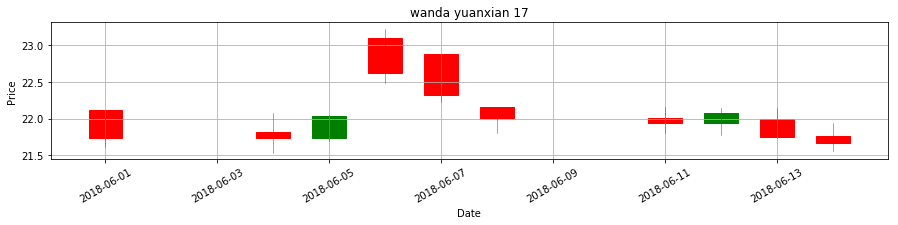

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
fig.subplots_adjust(bottom=0.5)
mpf.candlestick_ochl(ax, mat_wdyx, width=0.6, colorup='g', colordown='r', alpha=1.0)
plt.grid(True)
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
plt.title('wanda yuanxian 17')
plt.xlabel('Date')
plt.ylabel('Price')
# x轴的刻度为日期
ax.xaxis_date ()
###candlestick_ochl()函数的参数
# ax 绘图Axes的实例
# mat_wdyx 价格历史数据
# width    图像中红绿矩形的宽度,代表天数
# colorup  收盘价格大于开盘价格时的颜色
# colordown   低于开盘价格时矩形的颜色
# alpha      矩形的颜色的透明度

Text(0,0.5,'Price')

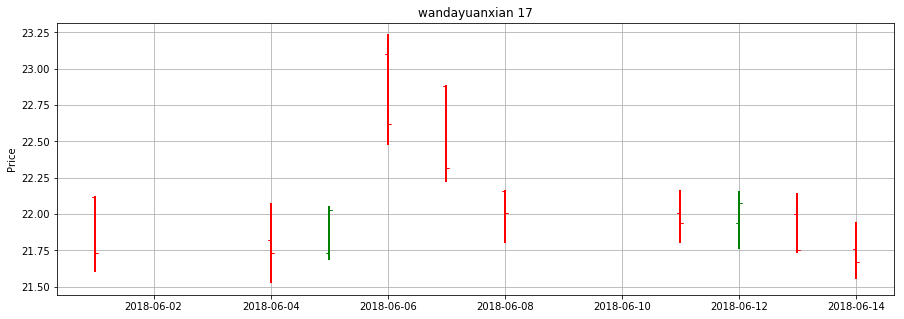

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
mpf.plot_day_summary_oclh(ax, mat_wdyx,colorup='g', colordown='r')
plt.grid(True)
ax.xaxis_date()
plt.title('wandayuanxian 17')
plt.ylabel('Price')

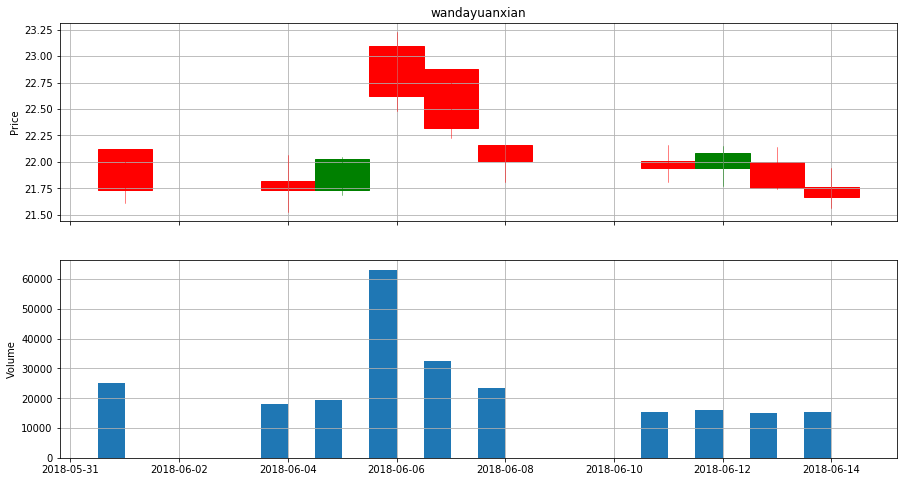

In [45]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,8))
mpf.candlestick_ochl(ax1, mat_wdyx, width=1.0, colorup = 'g', colordown = 'r')
ax1.set_title('wandayuanxian')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.xaxis_date()
plt.bar(mat_wdyx[:,0]-0.25, mat_wdyx[:,5], width= 0.5)
ax2.set_ylabel('Volume')
ax2.grid(True)